In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from joblib import dump, load
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('16-17.csv')
df.head()

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,STL,BLK,BLKA,PF,PFD,PTD,Year,Conference,Playoffs,Championship
0,240,Golden State Warriors,82,67,15,0.817,48.2,115.9,43.1,87.1,...,9.6,6.8,3.8,19.3,19.4,11.6,2016,Western,1,1
1,241,San Antonio Spurs,82,61,21,0.744,48.3,105.3,39.3,83.7,...,8.0,5.9,4.1,18.3,19.8,7.2,2016,Western,1,0
2,242,Houston Rockets,82,55,27,0.671,48.2,115.3,40.3,87.2,...,8.2,4.3,5.0,19.9,20.4,5.8,2016,Western,1,0
3,243,Boston Celtics,82,53,29,0.646,48.2,108.0,38.6,85.1,...,7.5,4.1,5.2,20.6,20.3,2.6,2016,Eastern,1,0
4,244,Utah Jazz,82,51,31,0.622,48.2,100.7,37.0,79.5,...,6.7,5.0,3.8,18.8,20.2,3.9,2016,Western,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30 non-null     int64  
 1   TEAM          30 non-null     object 
 2   GP            30 non-null     int64  
 3   W             30 non-null     int64  
 4   L             30 non-null     int64  
 5   WIN%          30 non-null     float64
 6   MIN           30 non-null     float64
 7   PTS           30 non-null     float64
 8   FGM           30 non-null     float64
 9   FGA           30 non-null     float64
 10  FG%           30 non-null     float64
 11  3PM           30 non-null     float64
 12  3PA           30 non-null     float64
 13  3P%           30 non-null     float64
 14  FTM           30 non-null     float64
 15  FTA           30 non-null     float64
 16  FT%           30 non-null     float64
 17  OREB          30 non-null     float64
 18  DREB          30 non-null     fl

## EDA

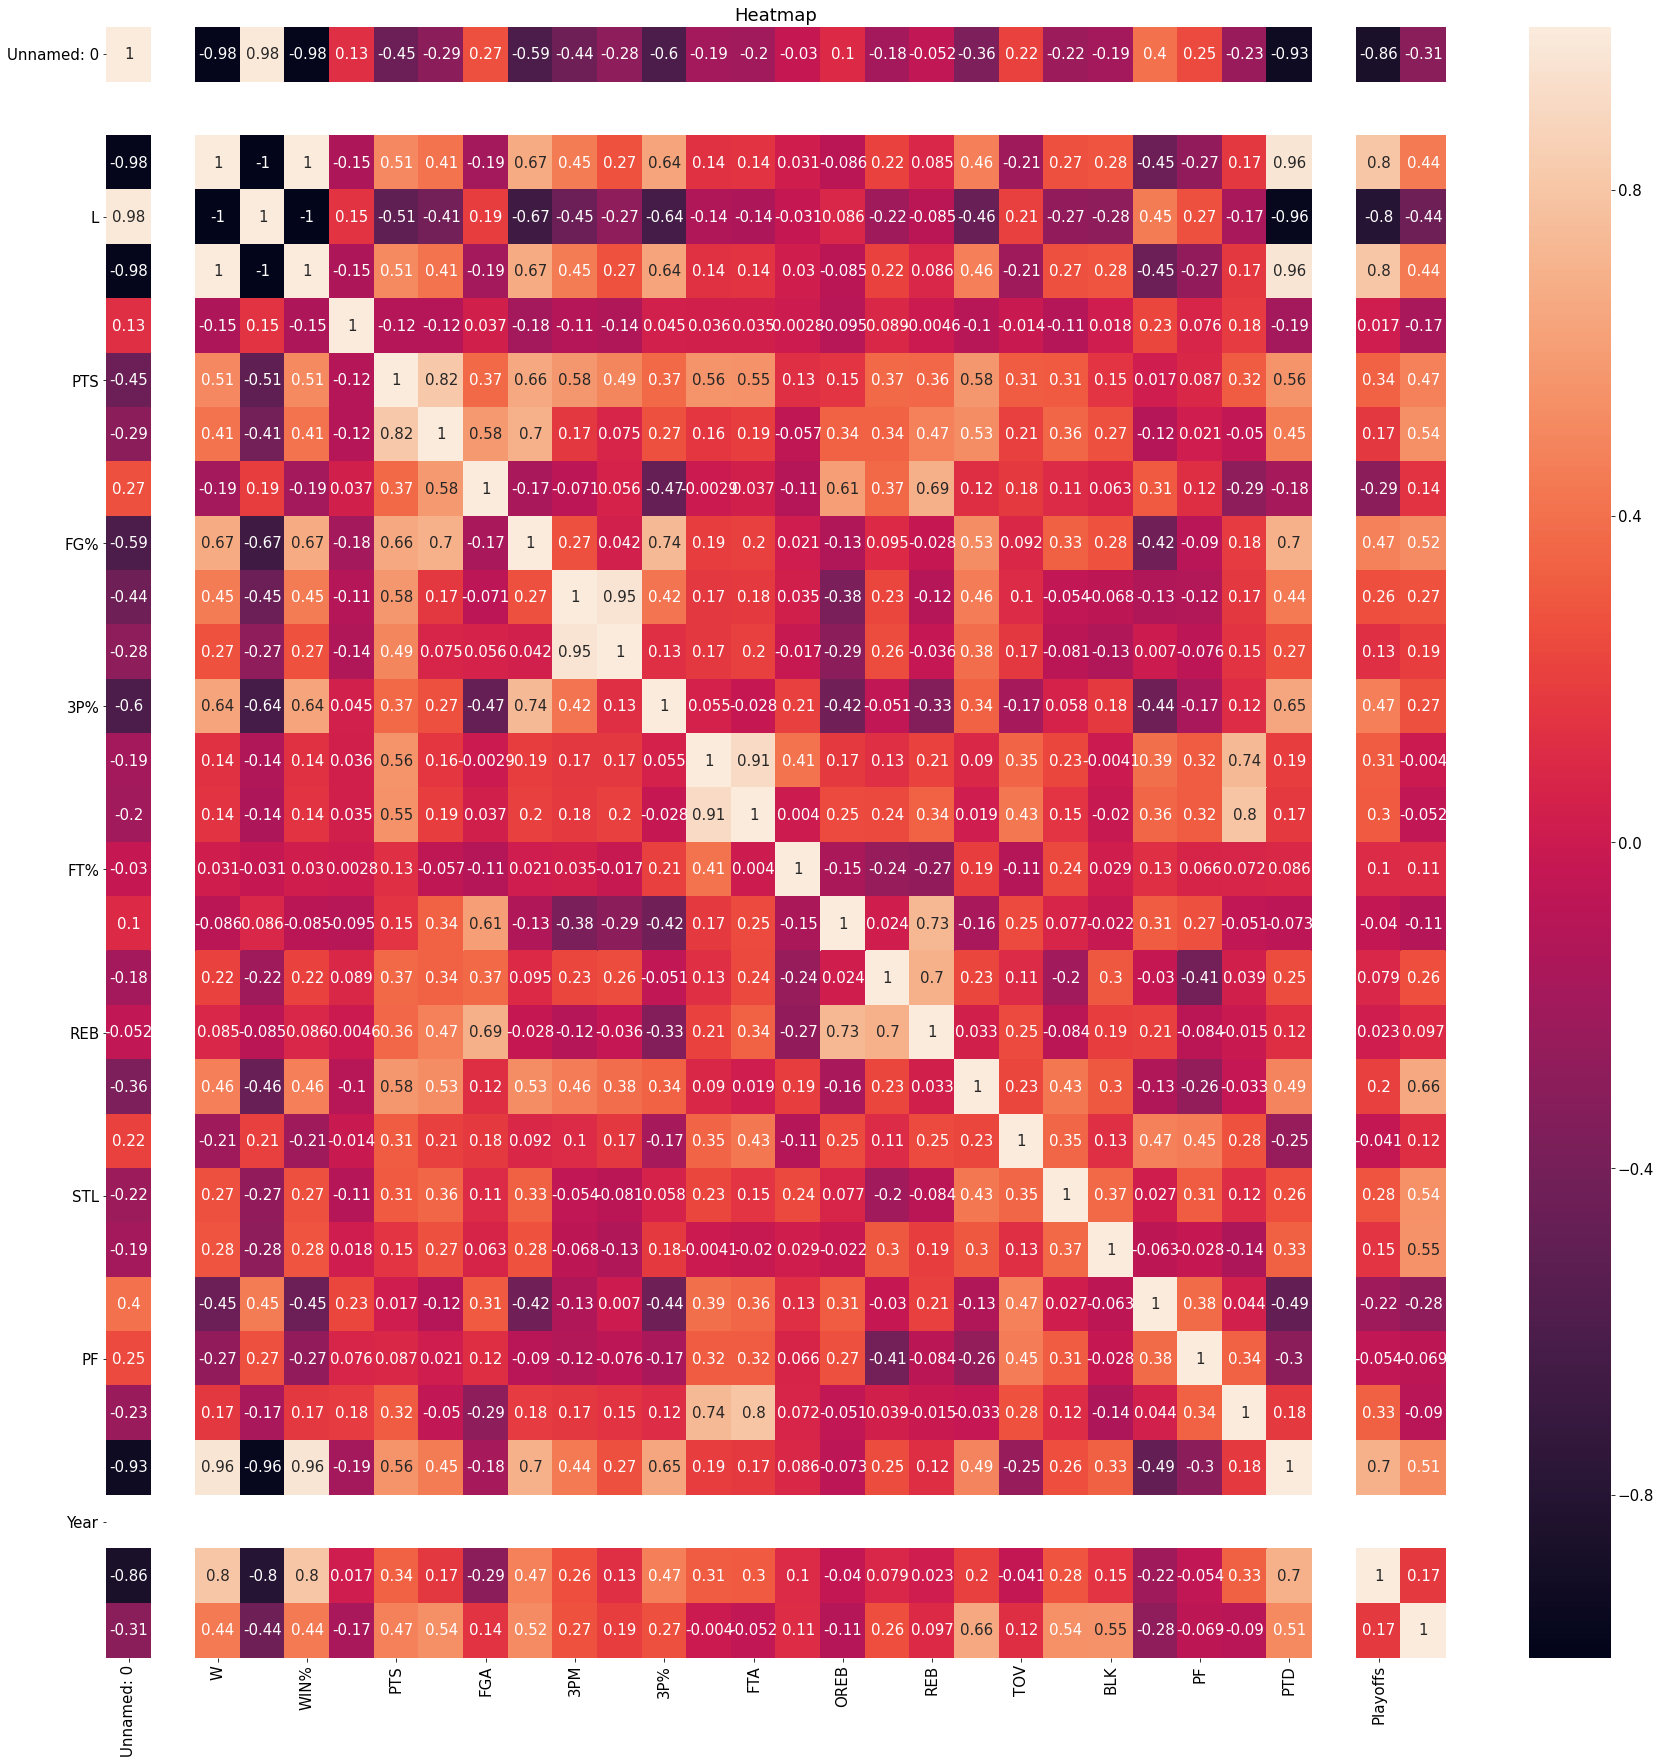

In [6]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap')
plt.rcParams.update({'font.size': 15})
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.show()

## Random Forest Regression

In [7]:
target_column = 'WIN%'
feature_columns = ['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                   'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD']
y = df[target_column]
X = df[feature_columns]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size = 10/30)

In [8]:
start = time.time()
print('start')
print()
rfr_param_grid = {'n_estimators':[10,50,100,200,500], 'max_depth': [1,2,3,4,5,6]}
rfr = RandomForestRegressor(random_state=0)
grid_rfr = GridSearchCV(rfr, param_grid=rfr_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_rfr.fit(X_train, y_train)
grid_rfr_mse_train = grid_rfr.score(X_train, y_train)
grid_rfr_mse = grid_rfr.score(X_test, y_test)
print('Best Parameters:', grid_rfr.best_params_)
print()
print('Train MSE score for the Random Forest Regression Model with the best parameters above: %.4f' % grid_rfr_mse_train)
print()
print('Test MSE score for the Random Forest Regression Model with the best parameters above: %.4f' % grid_rfr_mse)
print()
print('end')
print()
end = time.time()
print(end - start)

start

Best Parameters: {'max_depth': 1, 'n_estimators': 500}

Train MSE score for the Random Forest Regression Model with the best parameters above: -0.0067

Test MSE score for the Random Forest Regression Model with the best parameters above: -0.0134

end

34.982102155685425


In [9]:
rfr_best_param_model = RandomForestRegressor(n_estimators=500, max_depth=1, random_state=0)
rfr_best_param_model.fit(X_train, y_train)
rfr_best_param_model_predictions = rfr_best_param_model.predict(X_test)
print('Mean Squared Error with the Best Parameters From Above:', mean_squared_error(y_true=y_test,y_pred=rfr_best_param_model_predictions))

Mean Squared Error with the Best Parameters From Above: 0.013378348892749678


In [10]:
df_feature_importances = pd.DataFrame(rfr_best_param_model.feature_importances_, 
                                      index = X_train.columns, 
                                      columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
df_feature_importances

,index,Importance
0,3P%,0.394
1,FG%,0.276
2,PTS,0.138
3,AST,0.052
4,BLK,0.040
5,BLKA,0.018
6,OREB,0.016
7,PFD,0.016
8,FGM,0.010
9,3PA,0.008


In [11]:
dump(rfr_best_param_model,filename='2016-2017 Random Forest Regressor.joblib')

['2016-2017 Random Forest Regressor.joblib']